## Volatility & Simple Moving Average for TSLA 

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
# import TSLA data
data = pd.read_csv("TSLA_updated.csv", index_col = 0, parse_dates = True)
df = pd.DataFrame(data)

In [3]:
df = df.drop(["Daily_Pct_Change"],axis=1)

In [8]:
# redo the percent change column (currently is close-open /close*100)

df["Daily_Percent_Change"] = df["Close"].pct_change()
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_Pct_Change,Normalized_Change,Daily_Percent_Change
Date,,,,,,,,,,
2020-05-26,166.90,166.92,163.14,163.77,163.77,40448500,-3.13,-1.87,1.00,NaN
2020-05-27,164.17,165.54,157.00,164.05,164.05,57747500,-0.13,-0.08,1.00,0.001710
2020-05-28,162.70,164.95,160.34,161.16,161.16,36278000,-1.54,-0.95,0.98,-0.017617
2020-05-29,161.75,167.00,160.84,167.00,167.00,58822500,5.25,3.25,1.02,0.036237
2020-06-01,171.60,179.80,170.82,179.62,179.62,74697500,8.02,4.67,1.10,0.075569


In [9]:
# use np.log

df["Log_Returns"] = np.log(df["Close"]/df["Close"].shift())
# shift just "shifts" the row value down by the number within the () - in this case, just 1 spot
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_Pct_Change,Normalized_Change,Daily_Percent_Change,Log_Returns
Date,,,,,,,,,,,
2020-05-26,166.90,166.92,163.14,163.77,163.77,40448500,-3.13,-1.87,1.00,NaN,NaN
2020-05-27,164.17,165.54,157.00,164.05,164.05,57747500,-0.13,-0.08,1.00,0.001710,0.001708
2020-05-28,162.70,164.95,160.34,161.16,161.16,36278000,-1.54,-0.95,0.98,-0.017617,-0.017774


##### Remember, there are 252 trading days a year for when calculating volatility

In [6]:
df["Log_Returns"].std()

0.04605813162607862

In [11]:
volatility = df["Log_Returns"].std()*252**.5
# .5 there means taking the square root of the raised number
volatility

0.7311501728092981

In [19]:
str_vol = str(round(volatility, 5)*100)
print("the volatility is :", str_vol)

the volatility is : 73.115


<IPython.core.display.Javascript object>


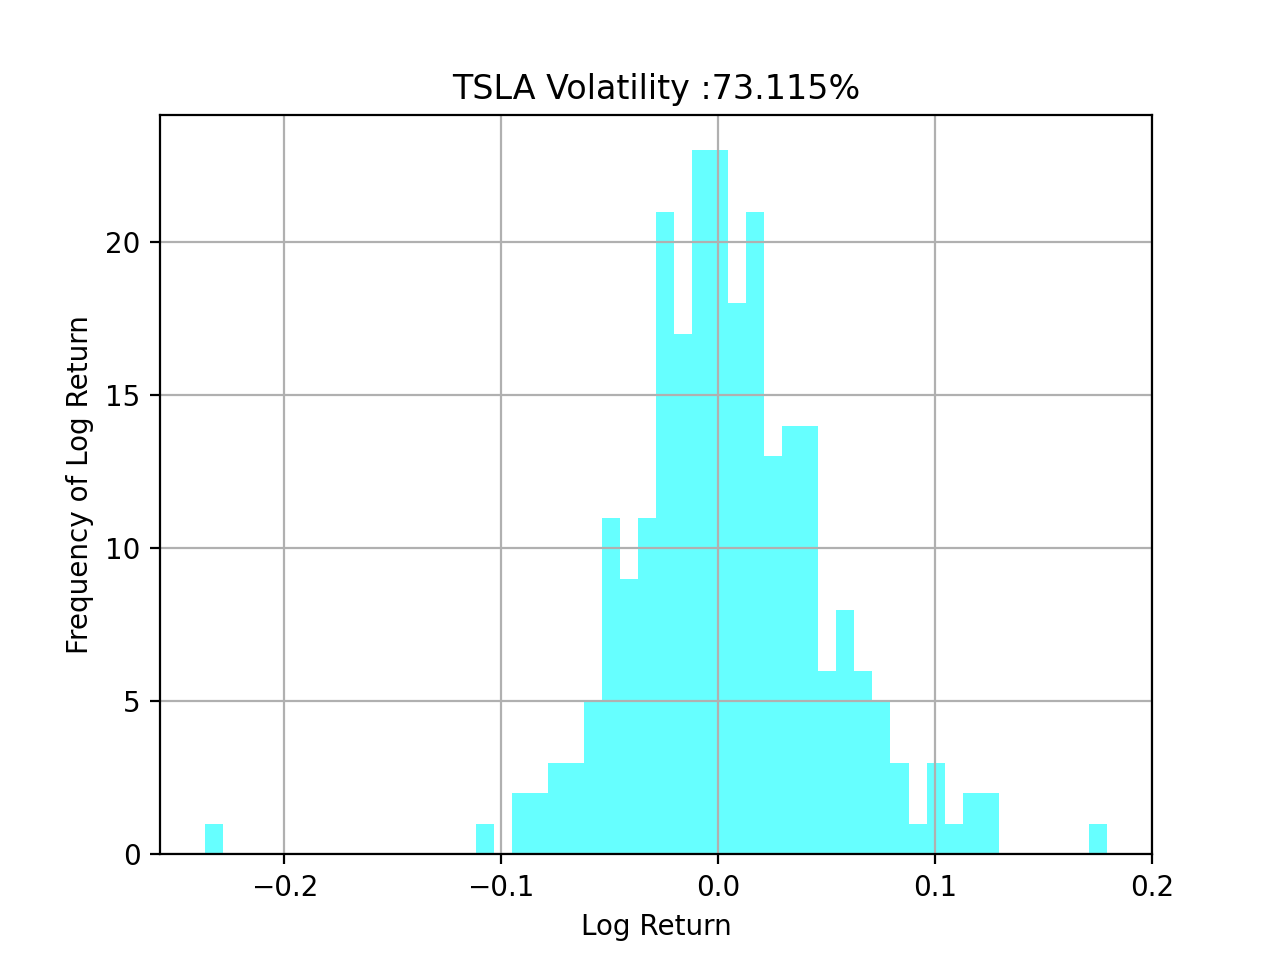

In [21]:
fix, ax = plt.subplots()
df["Log_Returns"].hist(ax=ax, bins=50, alpha=0.60, color ="cyan")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("TSLA Volatility :" + str_vol + "%")
# plt.savefig("TSLA_Volatility_Hist.png")

### Moving Average 

In [22]:
df["Close"].rolling(2).sum()
# result is the sum of the last 2 dates  - can use .sum(), .mean() etc

Date
2020-05-26        NaN
2020-05-27     327.82
2020-05-28     325.21
2020-05-29     328.16
2020-06-01     346.62
               ...   
2021-05-17    1166.57
2021-05-18    1154.70
2021-05-19    1141.33
2021-05-20    1150.24
2021-05-21    1167.66
Name: Close, Length: 251, dtype: float64

In [24]:
df["MA_10"]=df["Close"].rolling(10).mean()
# create a new column of the rolling 10 day averages using Moving Average
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_Pct_Change,Normalized_Change,Daily_Percent_Change,Log_Returns,MA_10
Date,,,,,,,,,,,,
2021-05-17,575.55,589.73,561.20,576.83,576.83,32390400,1.28,0.22,3.52,-0.021891,-0.022134,625.484
2021-05-18,568.00,596.25,563.38,577.87,577.87,36830600,9.87,1.74,3.53,0.001803,0.001801,615.911
2021-05-19,552.55,566.21,546.98,563.46,563.46,39578400,10.91,1.97,3.44,-0.024936,-0.025253,605.163
2021-05-20,575.00,588.85,571.07,586.78,586.78,30821100,11.78,2.05,3.58,0.041387,0.040554,597.487
2021-05-21,596.11,596.68,580.00,580.88,580.88,25943600,-15.23,-2.55,3.55,-0.010055,-0.010106,588.338


### Exponential Moving Average 

In [26]:
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_Pct_Change,Normalized_Change,Daily_Percent_Change,Log_Returns,MA_10,EMA_10
Date,,,,,,,,,,,,,
2021-05-17,575.55,589.73,561.20,576.83,576.83,32390400,1.28,0.22,3.52,-0.021891,-0.022134,625.484,618.779720
2021-05-18,568.00,596.25,563.38,577.87,577.87,36830600,9.87,1.74,3.53,0.001803,0.001801,615.911,611.341589
2021-05-19,552.55,566.21,546.98,563.46,563.46,39578400,10.91,1.97,3.44,-0.024936,-0.025253,605.163,602.635846
2021-05-20,575.00,588.85,571.07,586.78,586.78,30821100,11.78,2.05,3.58,0.041387,0.040554,597.487,599.752965
2021-05-21,596.11,596.68,580.00,580.88,580.88,25943600,-15.23,-2.55,3.55,-0.010055,-0.010106,588.338,596.321517


####  EMA puts more value on recent values, so it's more reactive to recent change than SMA 

<IPython.core.display.Javascript object>


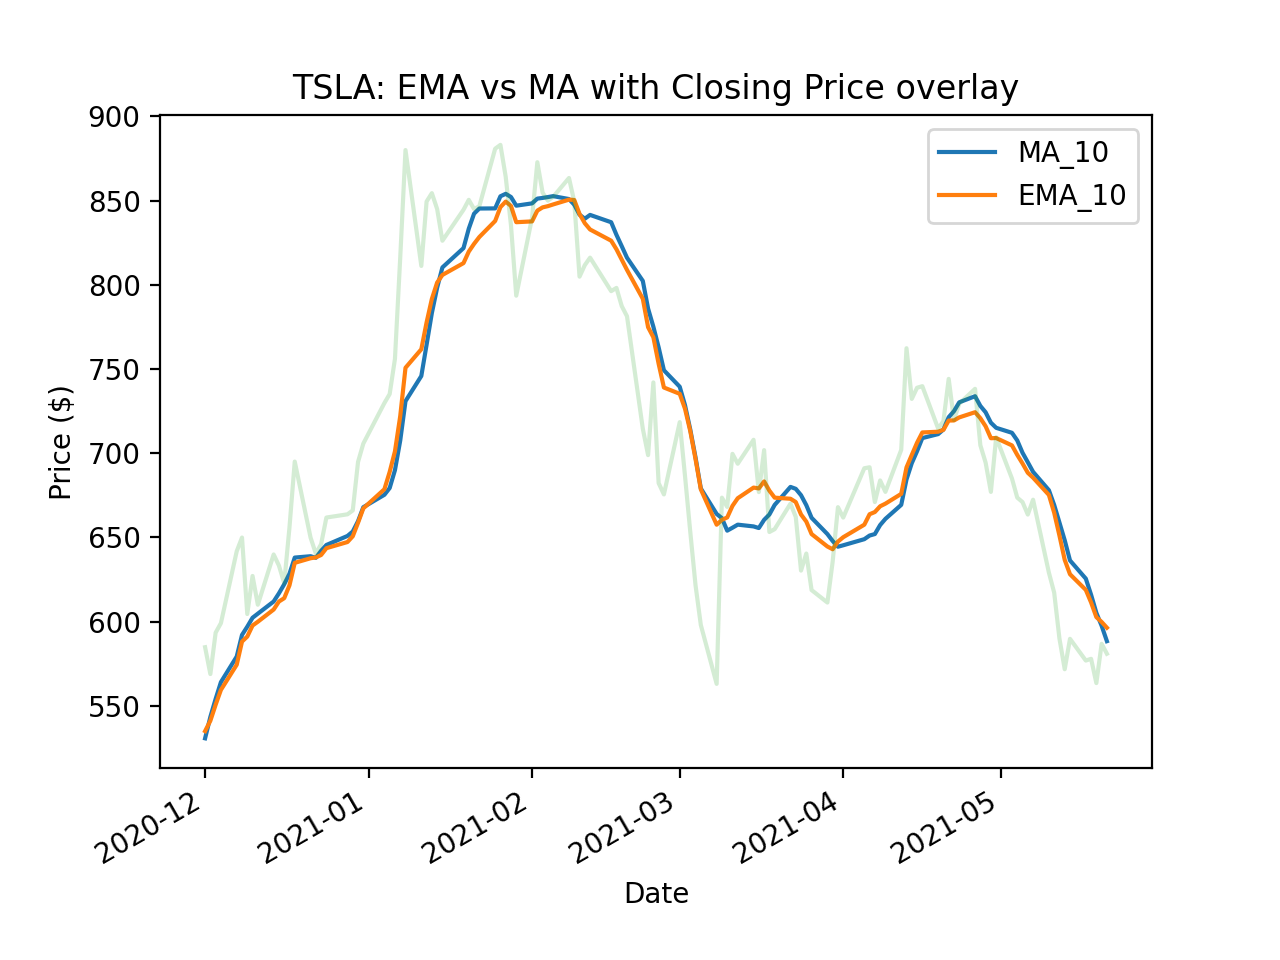

In [32]:
fig, ax = plt.subplots()
df[["MA_10", "EMA_10"]].loc["2020-12-01":].plot(ax=ax)
df["Close"].loc["2020-12-01":].plot(ax=ax, alpha =.20)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("TSLA: EMA vs MA with Closing Price overlay")
# save it
# plt.savefig("TSLA_EMA_MA.png")

# Shows how the Exponential moving average is more reactive than the simple moving average
# the EMA value goes up faster than the MA value as well as falls faster, better mirroring the current price